In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from epiweeks import Week
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from bayes_ensemble import *

In [2]:
df_models = pd.read_csv('/Users/eduardoaraujo/Documents/Github/Dengue-Forecast-Ensemble/predictions/preds_models.csv.gz',
                       index_col = 'Unnamed: 0')
df_models.date = pd.to_datetime(df_models.date)
#df_models = df_models.loc[df_models.date.isin(dates_25)]
df_models.head()

,date,pred,lower,upper,adm_1,model_id
0,2022-10-09,110.690113,64.291013,219.826948,AC,21
1,2022-10-16,144.952846,77.564037,279.722708,AC,21
2,2022-10-23,163.613937,92.915072,276.591399,AC,21
3,2022-10-30,170.240443,87.197631,378.407811,AC,21
4,2022-11-06,215.117888,111.835667,445.024983,AC,21


In [10]:
def make_plot(df_models, state, model_id):
    
    df_27_pars_lower = get_df_log_pars(df_models.loc[(df_models.model_id == model_id) & (df_models.adm_1 == state) ].reset_index(drop = True), fn_loss = 'lower')

    df_27_pars_median = get_df_log_pars(df_models.loc[(df_models.model_id == model_id) & (df_models.adm_1 == state) ].reset_index(drop = True), fn_loss = 'median')

    _,ax = plt.subplots(1,2, figsize = (13, 4))

    ax[0].plot(df_27_pars_lower.date, df_27_pars_lower.pred, label = 'real', color = 'tab:blue')
    
    ax[0].fill_between(df_27_pars_lower.date, df_27_pars_lower.lower, df_27_pars_lower.upper, alpha=0.1, color = 'tab:blue')
    
    ax[0].plot(df_27_pars_lower.date, df_27_pars_lower.fit_med, label = 'aprox', color = 'tab:orange', linestyle = '--')

    ax[0].fill_between(df_27_pars_lower.date, df_27_pars_lower.fit_lwr, df_27_pars_lower.fit_upr, alpha=0.1, color = 'tab:orange')

    ax[0].legend()

    ax[0].set_title('Curva com intervalos - Lower')

    ax[1].plot(df_27_pars_median.date, df_27_pars_median.pred, label = 'real', color = 'tab:blue')
    
    ax[1].fill_between(df_27_pars_median.date, df_27_pars_median.lower, df_27_pars_median.upper, alpha=0.1, color = 'tab:blue')
    
    ax[1].plot(df_27_pars_median.date, df_27_pars_median.fit_med, label = 'aprox', color = 'tab:orange', linestyle = '--')

    ax[1].fill_between(df_27_pars_median.date, df_27_pars_median.fit_lwr, df_27_pars_median.fit_upr, alpha=0.1, color = 'tab:orange')

    ax[1].legend()

    ax[1].set_title('Curva com intervalos - Median')

    plt.suptitle(f'{state} - Model {model_id}')
    
    plt.tight_layout()
    plt.show()


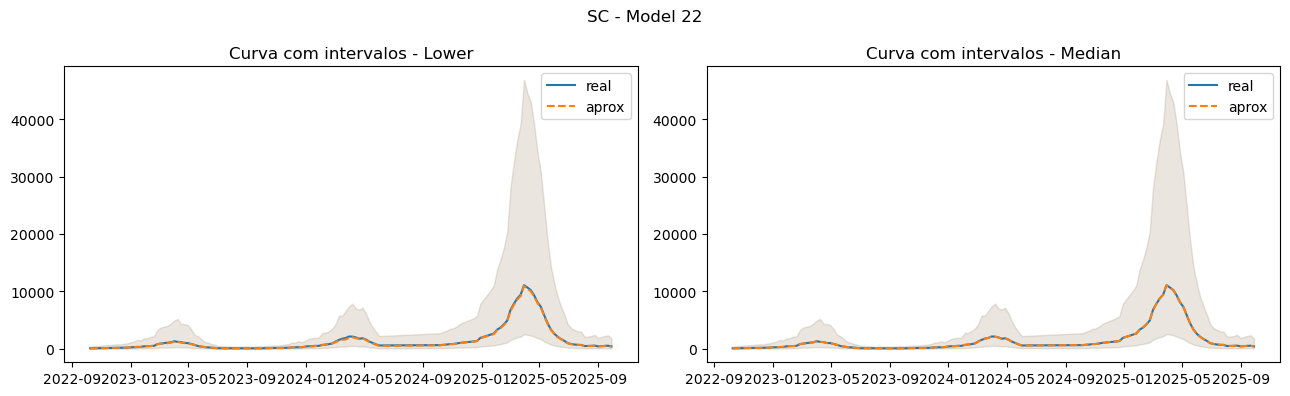

CPU times: user 1.98 s, sys: 7.6 ms, total: 1.99 s
Wall time: 2 s


In [13]:
%%time 
make_plot(df_models, 'SC', 22)

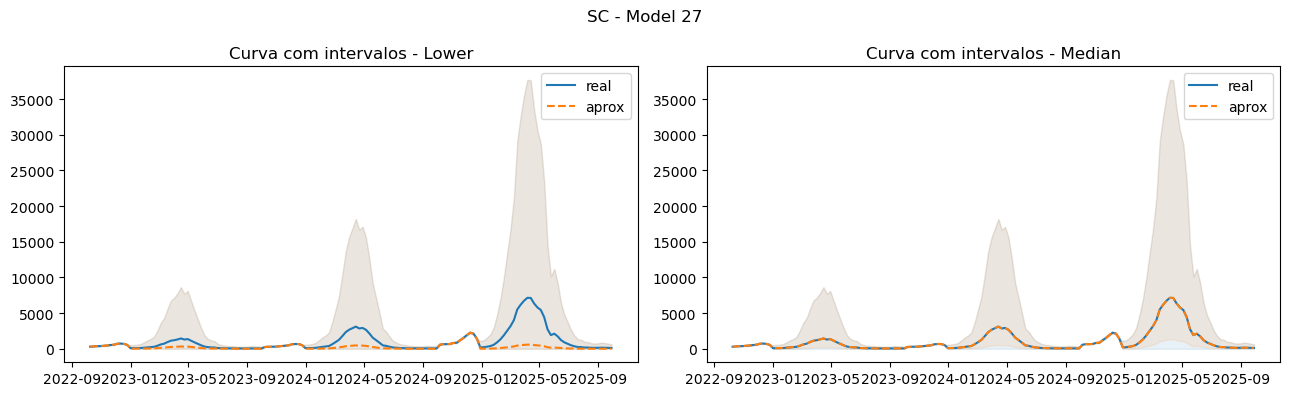

CPU times: user 3.22 s, sys: 17.1 ms, total: 3.23 s
Wall time: 3.26 s


In [11]:
%%time 
make_plot(df_models, 'SC', 27)

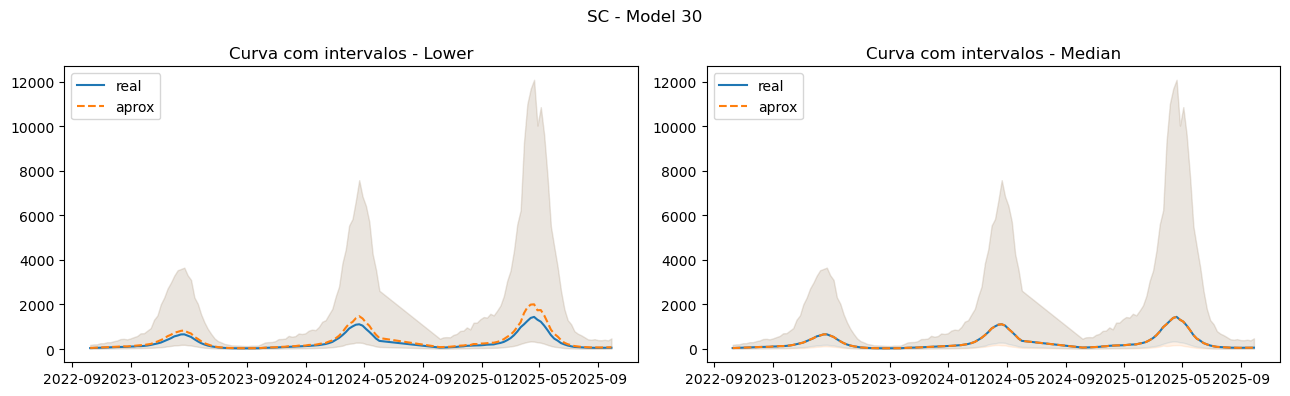

CPU times: user 2.09 s, sys: 18.1 ms, total: 2.11 s
Wall time: 2.13 s


In [12]:
%%time 
make_plot(df_models, 'SC', 30)